In [1]:
import sys
sys.path.append("..")
from utils import fit_and_plot, montecarlo_estimator
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/5CL Lab 2 - 1.3.csv")
df

,Angle,Angle Uncertainty,Intensity,Uncertainty,Unnamed: 4
0,0,2,1656.00,2.000,NaN
1,15,2,3007.00,2.240,NaN
2,30,2,4321.00,1.470,NaN
3,45,2,5242.00,3.650,NaN
4,60,2,5483.00,1.557,NaN
5,75,2,4976.00,1.560,NaN
6,90,2,4007.00,2.060,NaN
7,105,2,2572.00,1.408,NaN
8,120,2,1235.00,1.102,NaN
9,135,2,284.20,0.800,NaN


In [3]:
class ExpModel:
    def forward(self, theta, theta0, I0, Ibg):
        return Ibg + I0*np.square(np.cos(theta - theta0))
    def backward(self, theta, theta0, I0, Ibg):
        return -I0*np.sin(2*(theta - theta0))
expmodel = ExpModel()

[[-8.41878482e+00  7.65851988e-03]
 [ 5.45651793e+03  1.65568854e+01]
 [ 5.25790675e+00  1.11695066e+01]]


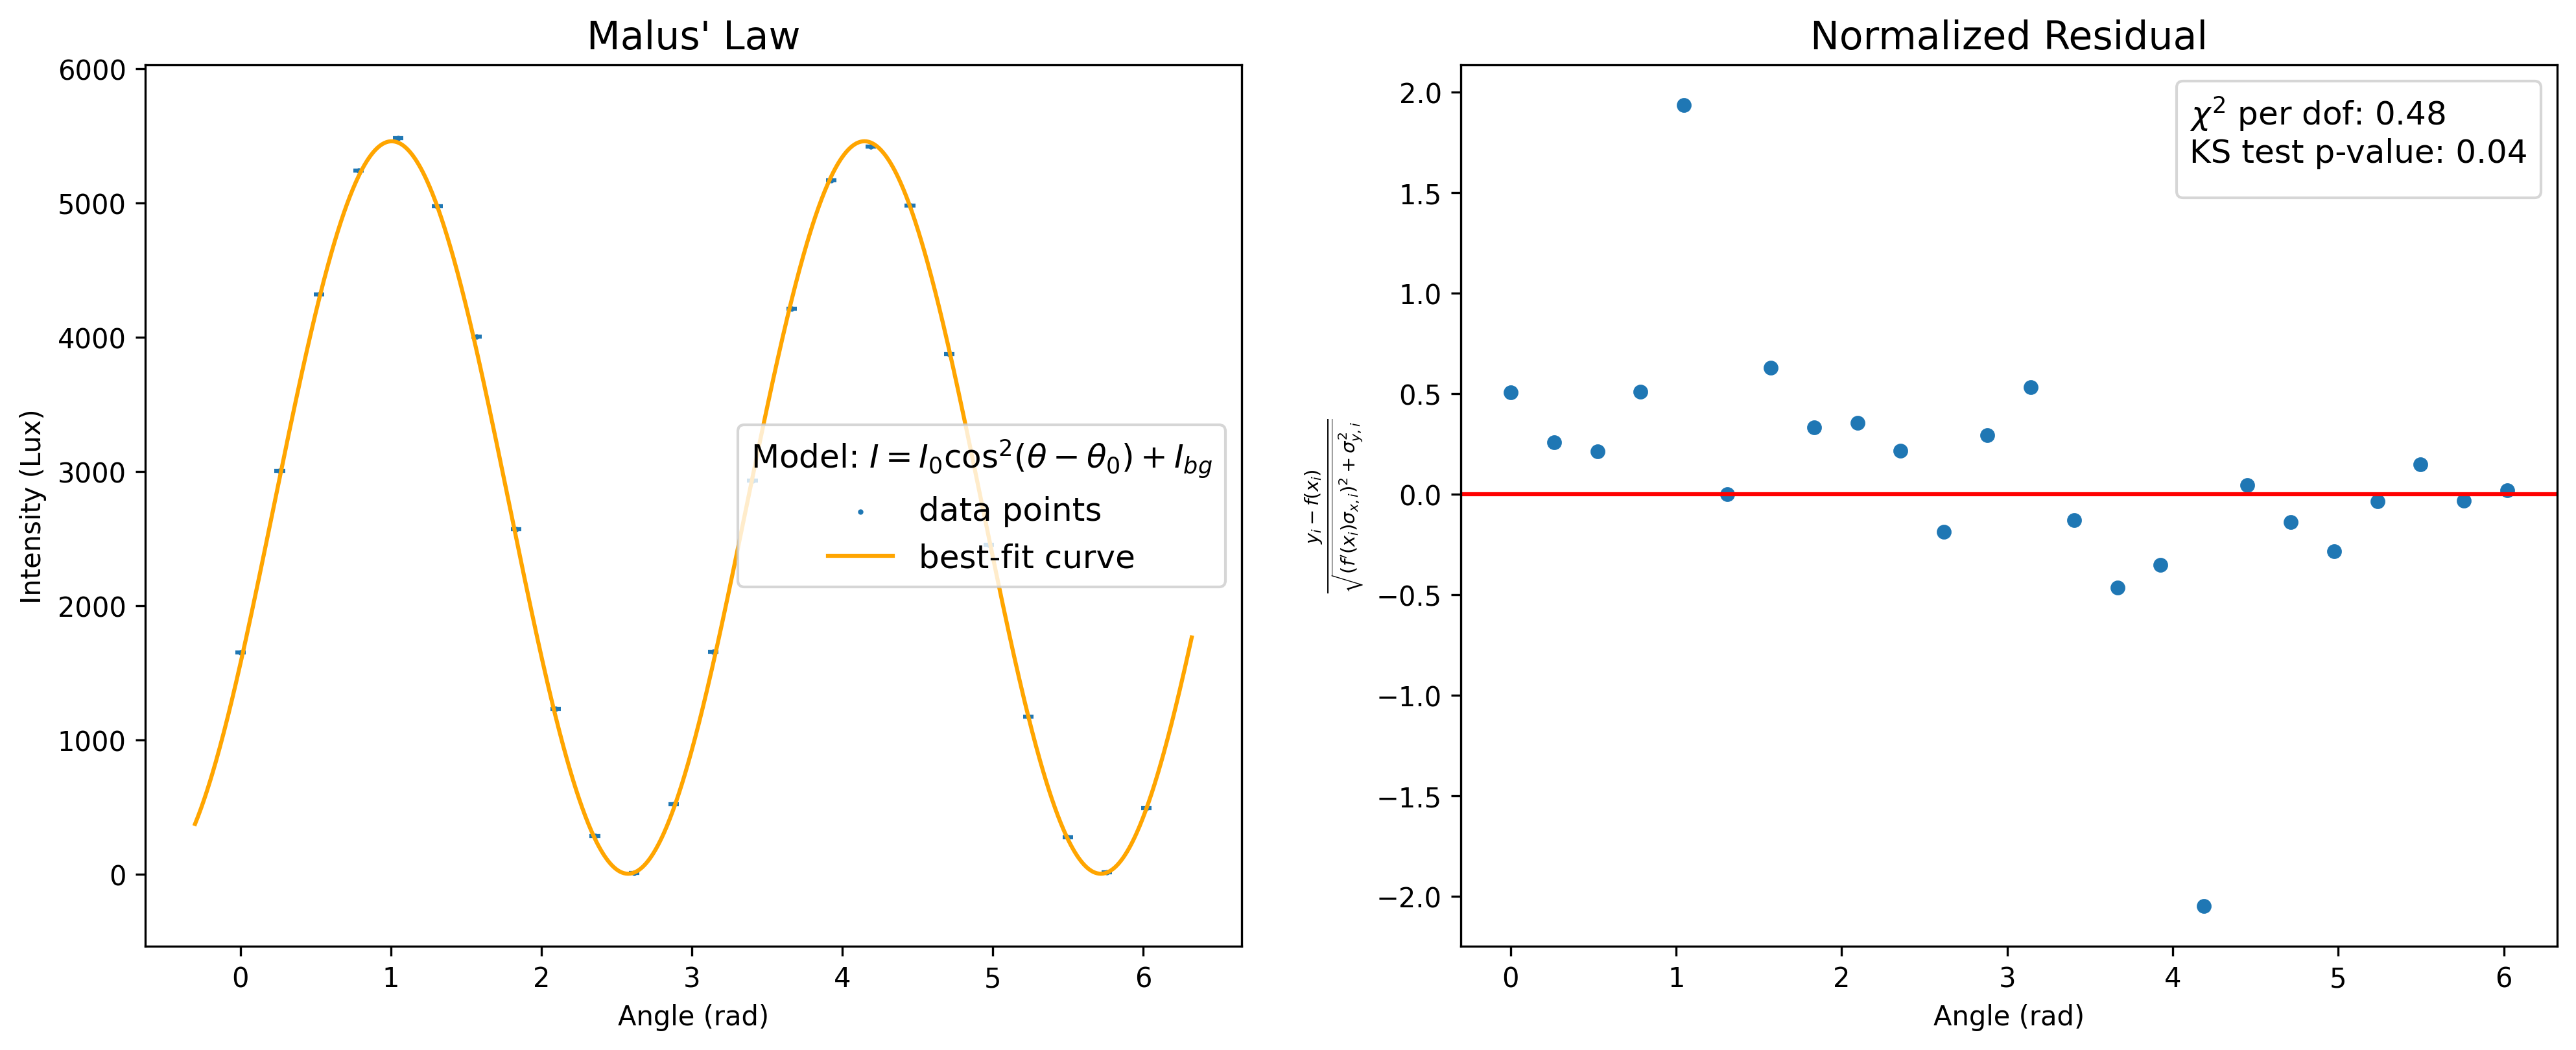

In [4]:
fit_and_plot(
    expmodel,
    df["Angle"]/180*np.pi, 
    df["Intensity"],
    df["Angle Uncertainty"]/180*np.pi,
    df["Uncertainty"],
    3,
    None,
    "Angle (rad)",
    "Intensity (Lux)",
    "Malus' Law",
    r"$I = I_0\cos^2(\theta - \theta_0) + I_{bg}$",
    True,
    );